이미지 사이즈변경을 위해 PIL 라이브러리를 사용한다.
만약 PIL 라이브러리가 설치되지 않은 경우 pip install pillow 를 통해 설치가 가능하다.

In [7]:
from PIL import *
import os
import glob

ModuleNotFoundError: No module named 'PIL'

준비한 가위이미지를 28x28 사이즈로 resize 한다.
동일한 방법으로 보와 바위도 resize 해준다.

In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [ ]:
import numpy as np

def load_data(img_path, number_of_data = 300):
        # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3 # 1이면 흑백 , 3이면 컬러
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


위의 출력값인 x_train 데이터는(데이터개수, 이미지크지 x, 이미지 크기y, 채널 수) 형태로 생성됨
컬러 이미지이기 때문에 R,G,B 값으로 표현되기 때문에 3개의 채널수를 가진다. 
만약 흑백 이미지라면 1개의 채널을 가지게 된다

불러온 데이터 확인해보기

라벨:  0


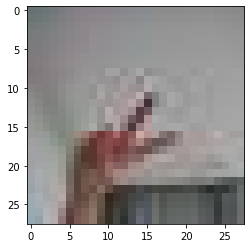

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
# 네트워크는 tf와 tf내에 속한 keras로 구축
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15


model=keras.models.Sequential() # Sequential API를 이용해 네트워크 model변수에 초기화
# conv2D레이어에 이미지 특징 수, 입력 이미지의 형태 등을 넣고 MaxPooling2D를 통해 맥스 풀링 연산을 함
# dense 레이어는 분류기에 사용되는 뉴런의 숫자를 입력하고 마지막 Dense 레이어에는 결과에 도출할 클래스 수를 입력함

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

epochs 값은 10으로 지정해서 학습 시킴

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10) # 10번 학습을 진행 시킴

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0781 - accuracy: 0.3900
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0097 - accuracy: 0.5033
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.7133
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.7667
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.7033
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.8067
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.8567
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.8667
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8933
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.9100
Epoch 11/20
10/10 [

In [ ]:
print("test 이미지 디렉토리 경로: ", image_dir_path)
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

test 이미지 디렉토리 경로:  /aiffel/aiffel/rock_scissor_paper/scissor
학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test shape: (300, 28, 28, 3)
x_test_norm shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.5365 - accuracy: 0.0000e+00
test_loss: 1.5365084409713745 
test_accuracy: 0.0


1차 결과물

학습 데이터 개수 확장시키기(총 이미지 3012개)

In [ ]:
def load_data3(img_path, number_of_data=3012):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3 # 1이면 흑백 , 3이면 컬러
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_train, y_train)=load_data3(image_dir_path4)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3012 입니다.
x_train shape: (3012, 28, 28, 3)
y_train shape: (3012,)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
95/95 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 2/10
95/95 [==============================] - 0s 3ms/step - loss: 8.8030e-04 - accuracy: 1.0000
Epoch 3/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9970
Epoch 4/10
95/95 [==============================] - 0s 3ms/step - loss: 6.6831e-04 - accuracy: 1.0000
Epoch 5/10
95/95 [==============================] - 0s 3ms/step - loss: 4.8735e-04 - accuracy: 1.0000
Epoch 6/10
95/95 [==============================] - 0s 3ms/step - loss: 3.9957e-04 - accuracy: 1.0000
Epoch 7/10
95/95 [==============================] - 0s 3ms/step - loss: 3.2458e-04 - accuracy: 1.0000
Epoch 8/10
95/95 [==============================] - 0s 3ms/step - loss: 2.9723e-04 - accuracy: 1.0000
Epoch 9/10
95/95 [==============================] - 0s 3ms/step - loss: 3.0732e-04 - accuracy: 1.0000
Epoch 10/10
95/95 [==============================] - 0s 3ms/step - loss: 2.4767e-04 - accu

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 8.8768 - accuracy: 0.0000e+00
test_loss: 8.876762390136719 
test_accuracy: 0.0


[회고]
모델을 구축하기전에 충분한 데이터 이미지가 필요하며, 그에 맞는 파라미터 값을 정해주어야한다.

1. 이미지 데이터가 224x224에서 28x28로 변경되면서 생긴 해상도 저하를 생각해야한다.

2. 가위바위보의 경우 데이터가 많을수록 주변환경을 고려를 많이 해야한다.
- 인종, 조명, 주변환경(배경에 오브젝트가 없어야 더 인식하기 좋음) ,가위(특히나 가위의 경우 엄지검지,검지중지,중지약지,약지소지) 이런식으로 여러가지의 종류를 고려해야함

3. 더 많고 다양한 데이터들을 수집하여 적절한 하이퍼파라미터와 히든 레이어를 결정하게 된다면 더 정확하지 않을까?